<a href="https://colab.research.google.com/github/ea-analisisdatos/ML_RegresionLineal_Lasso_Ridge_Evaluacion_Modelos_Regresion/blob/main/Evaluaci%C3%B3n_de_Modelos_de_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Investigación de Machine Learning para Algoritmos de Regresión**

Usaremos un conjunto de datos de ejemplo, generados con datos aleatorios sobre la venta de casas lo cuál estaremos usando para colocar en práctica los algoritmos.

## **Diccionario de datos:**
Aquí tienes un diccionario de datos mejorado para incluir en una celda de markdown en Google Colab. Las descripciones explican claramente cómo se generaron los datos aleatorios para cada columna y utilizan los nombres de las columnas en inglés como en tu DataFrame.

### **Diccionario de Datos del Dataset:**

- **`Size (m²)`**: Representa los tamaños de casas generados aleatoriamente entre 50 y 300 metros cuadrados. Esta variable se utiliza como una de las características independientes para predecir el precio de las casas.

- **`Number of Rooms`**: Indica el número de habitaciones en las casas, generado aleatoriamente entre 1 y 5 habitaciones. Esta variable se utiliza como una característica independiente para estimar el precio, ya que más habitaciones suelen aumentar el valor de la propiedad.

- **`Location (1=Urban, 0=Rural)`**: Variable categórica que representa la ubicación de las casas, generada aleatoriamente como '1' para una ubicación urbana y '0' para una ubicación rural. Esta variable captura el efecto de la ubicación en el precio de la casa, ya que las propiedades en áreas urbanas tienden a tener un precio más alto.

- **`Price (Thousands of $)`**: Precio de venta de las casas en miles de dólares, calculado a partir de una combinación de las otras características (tamaño, número de habitaciones y ubicación) más un componente de ruido aleatorio para simular la variabilidad en los precios reales. Esta es la variable dependiente que se intenta predecir utilizando las otras características del dataset.

- **`Year Built`**: Año en que la casa fue construida. Esta variable puede no tener una relación lineal directa con el precio de las casas en nuestro conjunto de datos, especialmente porque está generada aleatoriamente.

- **`Random Noise`**: Una columna de ruido aleatorio que no está relacionada con el precio. Esta variable ayudará a observar cómo Lasso maneja variables sin relación.

- **`Proximity to City Center`**: Distancia al centro de la ciudad en kilómetros. Esta podría tener alguna relación con el precio, pero será una variable más para que Lasso decida si es útil o no.

# **Algoritmos de Regresión**

Grupo de Trabajo:
- Erika Alvares
- Jhon Limones
- Xiomara Torres

## **Importación de las Librerías para Algoritmos de Regresión**


In [16]:
# Importar las bibliotecas necesarias
import numpy as np  # Biblioteca para operaciones numéricas y generación de datos aleatorios
import pandas as pd  # Biblioteca para manipulación y análisis de datos, especialmente útil para DataFrames
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal de scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Módulos de scikit-learn para calcular MSE, MAE, y R²
from sklearn.linear_model import Ridge  # Modelo de regresión Ridge de scikit-learn
from sklearn.linear_model import Lasso  # Modelo de regresión Lasso de scikit-learn
import matplotlib.pyplot as plt  # Biblioteca para crear gráficos y visualizaciones de datos




## **Generación del conjunto de datos para aplicación de los ejemplos**


In [38]:
# Configurar la semilla para la reproducibilidad
np.random.seed(42)

# Generar datos aleatorios para tamaños de casas (en metros cuadrados)
size = np.random.randint(50, 300, 100)  # Tamaños de casa entre 50 y 300 m²

# Generar datos aleatorios para número de habitaciones
rooms = np.random.randint(1, 6, 100)  # Número de habitaciones entre 1 y 5

# Generar datos aleatorios para la ubicación (1 = urbana, 0 = rural)
location = np.random.randint(0, 2, 100)  # 1 para urbana, 0 para rural

# Generar datos aleatorios para el año de construcción
year_built = np.random.randint(1950, 2020, 100)  # Años entre 1950 y 2020

# Generar datos aleatorios para la proximidad al centro de la ciudad (en km)
proximity_to_city_center = np.random.uniform(0, 30, 100)  # Distancias entre 0 y 30 km

# Generar ruido aleatorio que no tiene relación con el precio
random_noise = np.random.normal(0, 10, 100)  # Ruido aleatorio con media 0 y desviación estándar 10

# Generar datos aleatorios para precios de casas (en miles de dólares) basados en múltiples variables
price = size * 3 + rooms * 10 + location * 50 + np.random.normal(0, 30, 100)  # Precio de casas con algo de ruido

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Size (m²)': size,
    'Number of Rooms': rooms,
    'Location (1=Urban, 0=Rural)': location,
    'Year Built': year_built,
    'Proximity to City Center (km)': proximity_to_city_center,
    'Random Noise': random_noise,
    'Price (Thousands of $)': price
})

# Mostrar las primeras filas del DataFrame para verificar los datos generados
data.head()

,Size (m²),Number of Rooms,"Location (1=Urban, 0=Rural)",Year Built,Proximity to City Center (km),Random Noise,Price (Thousands of $)
0,152,2,1,1991,18.345411,-15.437254,502.052943
1,229,4,0,1956,2.447825,11.168934,686.864655
2,142,4,0,1965,0.155546,-11.555159,456.298816
3,64,1,1,2009,18.836832,15.701106,202.196477
4,156,5,1,1951,5.828219,-11.249517,619.832429


## **Regresión Lineal Simple y Multiple**

### **Regresión Lineal Simple**

Intercepto (b0): 40.76
Pendiente (b1): 3.08


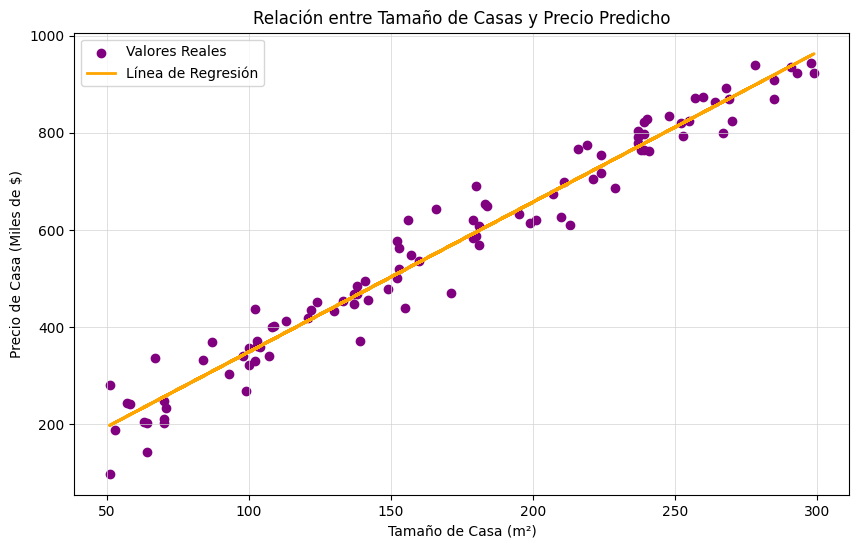

Próximos pasos recomendados:
- Recoger más datos para mejorar la precisión del modelo.
- Explorar variables adicionales que podrían influir en el precio, como ubicación, número de habitaciones, etc.
- Considerar modelos de regresión más complejos si se sospecha de relaciones no lineales en los datos.


In [18]:
# Preparar las variables independientes y dependientes
X = data[['Size (m²)']]  # Variable independiente (predictora)
y = data['Price (Thousands of $)']  # Variable dependiente (respuesta)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()  # Inicializar el modelo de regresión lineal
model.fit(X, y)  # Entrenar el modelo usando los datos

# Coeficientes del modelo
intercept = model.intercept_  # Intercepto de la recta (valor en y cuando x = 0)
slope = model.coef_[0]  # Pendiente de la recta (cambio en y por cada unidad de cambio en x)

print(f"Intercepto (b0): {intercept:.2f}")
print(f"Pendiente (b1): {slope:.2f}")

# Predecir los precios de las casas usando el modelo entrenado
y_pred = model.predict(X)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', label='Valores Reales')  # Puntos de datos en color púrpura
plt.plot(X, y_pred, color='orange', linestyle='-', linewidth=2, label='Línea de Regresión')  # Línea de regresión en naranja
plt.title('Relación entre Tamaño de Casas y Precio Predicho', color='black')
plt.xlabel('Tamaño de Casa (m²)', color='black')
plt.ylabel('Precio de Casa (Miles de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

# Recomendaciones sobre los próximos pasos a seguir
print("Próximos pasos recomendados:")
print("- Recoger más datos para mejorar la precisión del modelo.")
print("- Explorar variables adicionales que podrían influir en el precio, como ubicación, número de habitaciones, etc.")
print("- Considerar modelos de regresión más complejos si se sospecha de relaciones no lineales en los datos.")

### **Regresión Lineal Multiple**

Intercepto (b0): -8.48
Coeficientes (b1, b2, b3): [ 3.03408701 10.78636761 49.01148768]

Interpretación del gráfico Tamaño vs Precio:
- La gráfica muestra que a medida que el tamaño de la casa aumenta, el precio predicho también aumenta, lo que indica una correlación positiva entre el tamaño de la casa y el precio.
- Los puntos de datos predichos (en naranja) siguen de cerca la tendencia de los datos reales (en púrpura), lo que sugiere que el modelo está capturando bien la relación lineal entre el tamaño y el precio.

Interpretación del gráfico Número de Habitaciones vs Precio:
- La gráfica muestra que a medida que aumenta el número de habitaciones, el precio predicho también aumenta, lo que indica una correlación positiva entre el número de habitaciones y el precio.
- Los puntos predichos siguen una tendencia creciente similar a la de los datos reales, lo que sugiere que el modelo está capturando adecuadamente la relación entre el número de habitaciones y el precio.

Interpretación de

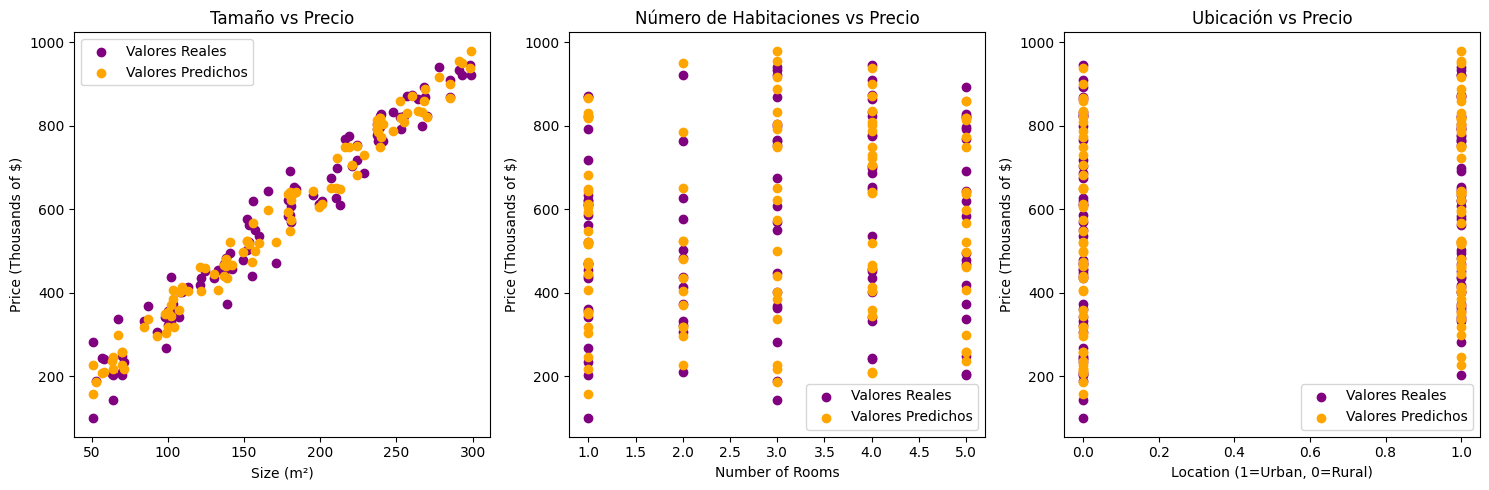


Próximos pasos recomendados:
- Verificar la multicolinealidad entre las variables independientes y eliminar aquellas que estén altamente correlacionadas.
- Recolectar más datos para mejorar la precisión y robustez del modelo.
- Considerar la posibilidad de transformaciones de variables o de usar modelos no lineales si la relación entre las variables no es lineal.
- Realizar una validación cruzada para evaluar la estabilidad del modelo.


In [19]:
# Preparar las variables independientes y dependiente
X = data[['Size (m²)', 'Number of Rooms', 'Location (1=Urban, 0=Rural)']]  # Variables independientes (predictoras)
y = data['Price (Thousands of $)']  # Variable dependiente (respuesta)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()  # Inicializar el modelo de regresión lineal múltiple
model.fit(X, y)  # Entrenar el modelo usando los datos

# Coeficientes del modelo
intercept = model.intercept_  # Intercepto de la recta (valor en y cuando x = 0)
coefficients = model.coef_  # Coeficientes de cada variable independiente

print(f"Intercepto (b0): {intercept:.2f}")
print(f"Coeficientes (b1, b2, b3): {coefficients}")

# Predecir los precios de las casas usando el modelo entrenado
y_pred = model.predict(X)

# Gráfica de dispersión de cada variable independiente contra el precio
plt.figure(figsize=(15, 5))

# Gráfica de Tamaño vs Precio
plt.subplot(1, 3, 1)
plt.scatter(data['Size (m²)'], y, color='purple', label='Valores Reales')
plt.scatter(data['Size (m²)'], y_pred, color='orange', label='Valores Predichos')
plt.xlabel('Size (m²)')
plt.ylabel('Price (Thousands of $)')
plt.title('Tamaño vs Precio')
plt.legend()

# Interpretación del gráfico
print("\nInterpretación del gráfico Tamaño vs Precio:")
print("- La gráfica muestra que a medida que el tamaño de la casa aumenta, el precio predicho también aumenta, lo que indica una correlación positiva entre el tamaño de la casa y el precio.")
print("- Los puntos de datos predichos (en naranja) siguen de cerca la tendencia de los datos reales (en púrpura), lo que sugiere que el modelo está capturando bien la relación lineal entre el tamaño y el precio.")

# Gráfica de Número de Habitaciones vs Precio
plt.subplot(1, 3, 2)
plt.scatter(data['Number of Rooms'], y, color='purple', label='Valores Reales')
plt.scatter(data['Number of Rooms'], y_pred, color='orange', label='Valores Predichos')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (Thousands of $)')
plt.title('Número de Habitaciones vs Precio')
plt.legend()

# Interpretación del gráfico
print("\nInterpretación del gráfico Número de Habitaciones vs Precio:")
print("- La gráfica muestra que a medida que aumenta el número de habitaciones, el precio predicho también aumenta, lo que indica una correlación positiva entre el número de habitaciones y el precio.")
print("- Los puntos predichos siguen una tendencia creciente similar a la de los datos reales, lo que sugiere que el modelo está capturando adecuadamente la relación entre el número de habitaciones y el precio.")

# Gráfica de Ubicación vs Precio
plt.subplot(1, 3, 3)
plt.scatter(data['Location (1=Urban, 0=Rural)'], y, color='purple', label='Valores Reales')
plt.scatter(data['Location (1=Urban, 0=Rural)'], y_pred, color='orange', label='Valores Predichos')
plt.xlabel('Location (1=Urban, 0=Rural)')
plt.ylabel('Price (Thousands of $)')
plt.title('Ubicación vs Precio')
plt.legend()

# Interpretación del gráfico
print("\nInterpretación del gráfico Ubicación vs Precio:")
print("- La gráfica muestra que las casas ubicadas en áreas urbanas (1) tienden a tener un precio más alto en comparación con las casas en áreas rurales (0), lo que indica una diferencia en los precios basada en la ubicación.")
print("- Los puntos de datos predichos reflejan esta tendencia, mostrando que el modelo captura la diferencia de precio entre ubicaciones urbanas y rurales.")

plt.tight_layout()
plt.show()

# Recomendaciones sobre los próximos pasos a seguir
print("\nPróximos pasos recomendados:")
print("- Verificar la multicolinealidad entre las variables independientes y eliminar aquellas que estén altamente correlacionadas.")
print("- Recolectar más datos para mejorar la precisión y robustez del modelo.")
print("- Considerar la posibilidad de transformaciones de variables o de usar modelos no lineales si la relación entre las variables no es lineal.")
print("- Realizar una validación cruzada para evaluar la estabilidad del modelo.")

**Observación:**

- **Variables Discretas o Categóricas:** Cuando trabajas con variables discretas o categóricas como "Número de Habitaciones" o "Ubicación", no hay una relación continua que se pueda representar con una sola línea. En cambio, para cada categoría o valor discreto, hay múltiples observaciones que resultan en líneas verticales en la gráfica de dispersión.

## **Regularización: Ridge y Lasso**



#### **Concepto Regularización, Regresión Ridge y Regresión Lasso**

**Regularización**

Regularización es una técnica utilizada en modelos de regresión lineal para **prevenir el sobreajuste (overfitting)**.

El sobreajuste ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, capturando ruido y patrones no generales que no se trasladan bien a datos nuevos.

La regularización agrega una penalización al modelo para simplificarlo, reduciendo la magnitud de los coeficientes (pesos) y, por lo tanto, mejorando la capacidad de generalización del modelo.

**Regresión Ridge (Ridge Regression):**
La regresión Ridge (también conocida como Tikhonov regularization o regresión de cresta) es una técnica de regularización que agrega una penalización basada en la suma de los cuadrados de los coeficientes a la función de pérdida del modelo de regresión lineal.

**Regresión Lasso (Least Absolute Shrinkage and Selection Operator):**
La regresión Lasso es otra técnica de regularización que agrega una penalización basada en la suma de los valores absolutos de los coeficientes a la función de pérdida del modelo de regresión lineal.

**Cuándo Usar Ridge o Lasso:**
- **Usa Ridge** cuando tienes muchas variables y sospechas que muchas de ellas están correlacionadas entre sí. Ridge mantendrá todas las variables pero reducirá sus coeficientes, lo que ayuda a prevenir el sobreajuste.

- **Usa Lasso** cuando crees que solo algunas variables son importantes para tu modelo y deseas realizar selección de variables. Lasso puede eliminar automáticamente las variables no importantes, simplificando el modelo.

### **Regresión Ridge**

#### Explicación del Código de Ejemplo para Regresión Ridge:



**Generación de Datos:**

Se generan datos aleatorios para el tamaño de la casa, número de habitaciones, ubicación, año de construcción, proximidad al centro de la ciudad y ruido aleatorio. Estas variables se combinan para calcular un precio de casa con un componente de ruido.

**Creación del Modelo Ridge:**

- Ridge(alpha=0.1): Se crea un modelo de regresión Ridge con un parámetro de regularización α=0.1. Este parámetro controla la magnitud de la penalización sobre los coeficientes del modelo para reducir el sobreajuste.

**Entrenamiento y Evaluación del Modelo:**

El modelo Ridge se ajusta a los datos generados y se imprimen los coeficientes resultantes. Estos coeficientes muestran cómo cada variable contribuye a la predicción del precio.

**Visualización y Comparación:**

- Tabla Comparativa: Se crea una tabla que muestra los precios reales y predichos para algunas observaciones, lo que permite una comparación rápida.
- Gráfica de Dispersión: Se genera un gráfico de dispersión que compara los precios reales con los precios predichos. La línea ideal (y=x) indica un ajuste perfecto. Si los puntos se alinean a lo largo de esta línea, el modelo está prediciendo bien.
Interpretación del Resultado:

La interpretación proporciona un análisis de los coeficientes de Ridge, la precisión del modelo y cómo Ridge maneja la multicolinealidad entre las variables independientes. Ridge ajusta los coeficientes para evitar el sobreajuste, lo que mejora la robustez del modelo sin eliminar variables.

**Este código es útil para observar cómo la regresión Ridge maneja múltiples variables y mejora la estabilidad del modelo, especialmente cuando se enfrentan a problemas de multicolinealidad.**

### Ejemplo de Código Regresión Ridge


Coeficientes de Ridge:
Size (m²)                         3.035267
Number of Rooms                  11.779142
Location (1=Urban, 0=Rural)      48.848899
Year Built                        0.200815
Proximity to City Center (km)     0.596181
Random Noise                     -0.276177
dtype: float64

Tabla comparativa de precios reales y predichos:
   Precio Real (Thousands of $)  Precio Predicho (Thousands of $)
0                    502.052943                        530.027920
1                    686.864655                        714.598501
2                    456.298816                        457.246843
3                    202.196477                        246.453199
4                    619.832429                        560.854739


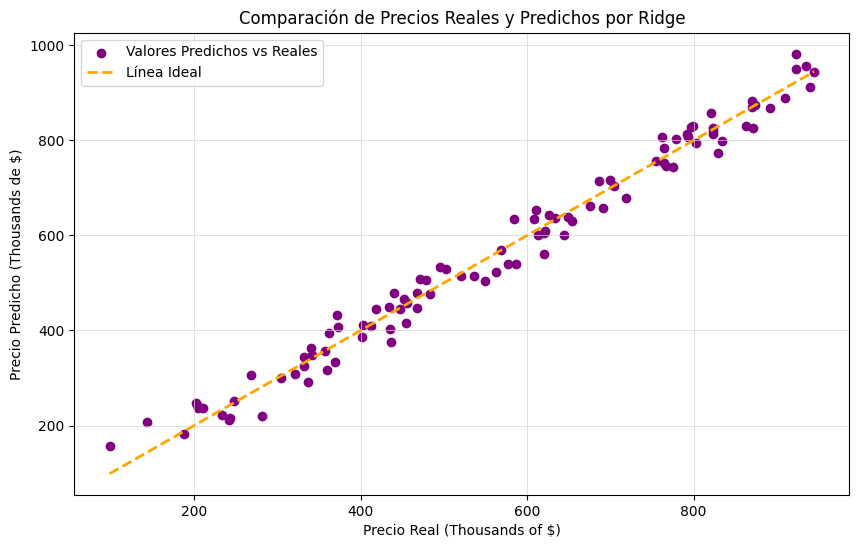

In [40]:
# Preparar las variables independientes y dependiente
X = data[['Size (m²)', 'Number of Rooms', 'Location (1=Urban, 0=Rural)', 'Year Built', 'Proximity to City Center (km)', 'Random Noise']]  # Variables independientes (predictoras)
y = data['Price (Thousands of $)']  # Variable dependiente (respuesta)

# Crear y entrenar el modelo de regresión Ridge
ridge = Ridge(alpha=0.1)  # Inicializar el modelo Ridge con un parámetro de regularización alfa
ridge.fit(X, y)  # Entrenar el modelo Ridge usando los datos

# Imprimir los coeficientes del modelo Ridge
print("\nCoeficientes de Ridge:")
print(pd.Series(ridge.coef_, index=X.columns))

# Predecir los precios de las casas usando el modelo entrenado
y_pred = ridge.predict(X)

# Crear una tabla comparativa de los precios reales y predichos
comparison = pd.DataFrame({'Precio Real (Thousands of $)': y, 'Precio Predicho (Thousands of $)': y_pred})
print("\nTabla comparativa de precios reales y predichos:")
print(comparison.head())

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='purple', label='Valores Predichos vs Reales')  # Puntos de datos en color púrpura
plt.plot([min(y), max(y)], [min(y), max(y)], color='orange', linestyle='--', linewidth=2, label='Línea Ideal')  # Línea ideal (y=x) en naranja
plt.title('Comparación de Precios Reales y Predichos por Ridge', color='black')
plt.xlabel('Precio Real (Thousands of $)', color='black')
plt.ylabel('Precio Predicho (Thousands de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()



### **Regresión Lasso**

### Explicación del Código de Ejemplo para Regresión Lasso:

**Generación de Datos:**

Se generan datos aleatorios para el tamaño de la casa, número de habitaciones, ubicación, año de construcción, proximidad al centro de la ciudad, y ruido aleatorio. Estas variables se combinan para calcular un precio de casa con un componente de ruido.

**Creación del Modelo Lasso:**

- Lasso(alpha=0.1): Se crea un modelo de regresión Lasso con un parámetro de regularización α=0.1. Este parámetro controla la magnitud de la penalización sobre los coeficientes del modelo para reducir el sobreajuste y eliminar variables irrelevantes.

- Entrenamiento y Evaluación del Modelo:

El modelo Lasso se ajusta a los datos generados y se imprimen los coeficientes resultantes. Algunos coeficientes pueden ser exactamente cero, indicando que Lasso ha eliminado esas variables del modelo.

- Visualización y Comparación:

- Tabla Comparativa: Se crea una tabla que muestra los precios reales y predichos para algunas observaciones, permitiendo una comparación rápida.

- Gráfica de Dispersión: Se genera un gráfico de dispersión que compara los precios reales con los precios predichos. La línea ideal (y=x) indica un ajuste perfecto. Si los puntos se alinean a lo largo de esta línea, el modelo está prediciendo bien.

- Interpretación del Resultado:

La interpretación proporciona un análisis de los coeficientes de Lasso, la precisión del modelo y cómo Lasso maneja la selección de variables, eliminando aquellas que no contribuyen al modelo.

**Este código es útil para observar cómo la regresión Lasso maneja múltiples variables, seleccionando automáticamente las más importantes y simplificando el modelo al eliminar aquellas que son irrelevantes o tienen poca influencia.**

### Ejemplo de Código de Regresión Lasso


Coeficientes de Lasso:
Size (m²)                        3.076293
Number of Rooms                  0.000000
Location (1=Urban, 0=Rural)      0.000000
Year Built                       0.028576
Proximity to City Center (km)    0.000000
Random Noise                    -0.000000
dtype: float64

Variables eliminadas por Lasso (coeficiente = 0):
Index(['Number of Rooms', 'Location (1=Urban, 0=Rural)',
       'Proximity to City Center (km)', 'Random Noise'],
      dtype='object')

Variables seleccionadas por Lasso (coeficiente != 0):
Index(['Size (m²)', 'Year Built'], dtype='object')


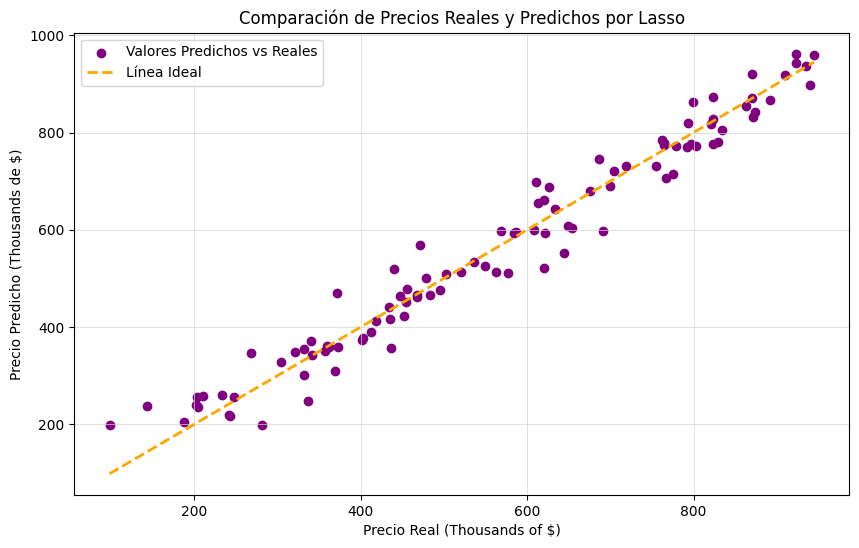

In [39]:
# Preparar las variables independientes y dependiente
X = data[['Size (m²)', 'Number of Rooms', 'Location (1=Urban, 0=Rural)', 'Year Built', 'Proximity to City Center (km)', 'Random Noise']]
y = data['Price (Thousands of $)']

# Aumentar el parámetro alpha para aumentar la penalización
lasso = Lasso(alpha=35)  # Aumentar alpha a 50 para aplicar mayor penalización

# Entrenar el modelo de regresión Lasso
lasso.fit(X, y)

# Imprimir los coeficientes del modelo Lasso
coef_lasso = pd.Series(lasso.coef_, index=X.columns)
print("\nCoeficientes de Lasso:")
print(coef_lasso)

# Identificar las variables eliminadas y seleccionadas por Lasso
variables_eliminadas = coef_lasso[coef_lasso == 0].index
variables_seleccionadas = coef_lasso[coef_lasso != 0].index

print("\nVariables eliminadas por Lasso (coeficiente = 0):")
print(variables_eliminadas)

print("\nVariables seleccionadas por Lasso (coeficiente != 0):")
print(variables_seleccionadas)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y, lasso.predict(X), color='purple', label='Valores Predichos vs Reales')
plt.plot([min(y), max(y)], [min(y), max(y)], color='orange', linestyle='--', linewidth=2, label='Línea Ideal')
plt.title('Comparación de Precios Reales y Predichos por Lasso', color='black')
plt.xlabel('Precio Real (Thousands of $)', color='black')
plt.ylabel('Precio Predicho (Thousands de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

## **Evaluación de Modelos de Regresión**

Evaluar la calidad de un modelo de regresión es crucial para determinar su utilidad y confiabilidad. Existen diversas métricas que nos ayudan a comprender qué tan bien se ajusta el modelo a los datos y qué tan precisas son sus predicciones. A continuación, exploraremos algunas de las métricas más comunes y cómo interpretarlas.

### **Métrica: R-cuadrado (R²) o coeficiente de determinación**
Indica qué porcentaje de la variación en la variable dependiente es explicado por el modelo de regresión. Rango de 0 a 1, donde 1 significa un ajuste perfecto.

R² (Coeficiente de Determinación): 0.96


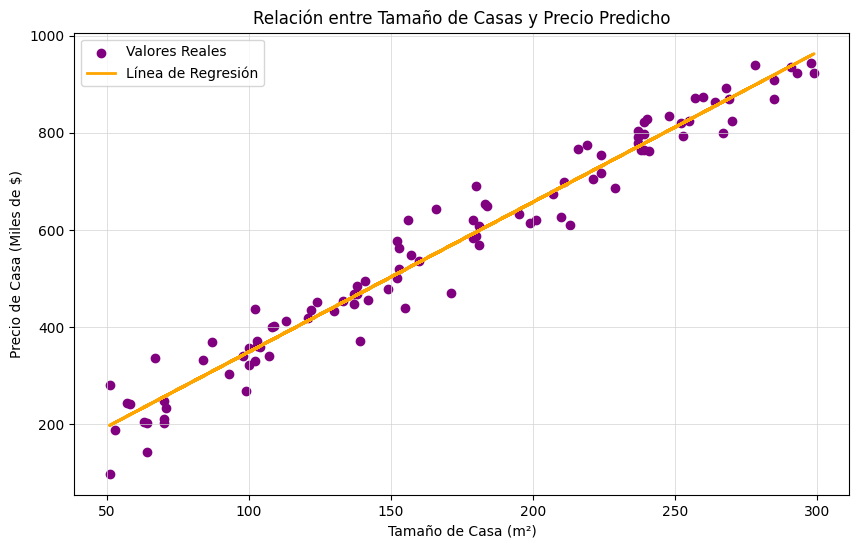

El modelo tiene un buen ajuste y es apto para predecir los precios de las casas basándose en su tamaño.


In [22]:
# Preparar las variables independientes y dependientes
X = data[['Size (m²)']]  # Variable independiente
y = data['Price (Thousands of $)']  # Variable dependiente

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir los precios de las casas
y_pred = model.predict(X)

# Calcular el R^2
r2 = r2_score(y, y_pred)

# Mostrar el R^2
print(f"R² (Coeficiente de Determinación): {r2:.2f}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', label='Valores Reales')  # Puntos de datos en color púrpura
plt.plot(X, y_pred, color='orange', linestyle='-', linewidth=2, label='Línea de Regresión')  # Línea de regresión en naranja
plt.title('Relación entre Tamaño de Casas y Precio Predicho', color='black')
plt.xlabel('Tamaño de Casa (m²)', color='black')
plt.ylabel('Precio de Casa (Miles de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

# Interpretación del resultado
if r2 > 0.8:
    print("El modelo tiene un buen ajuste y es apto para predecir los precios de las casas basándose en su tamaño.")
else:
    print("El modelo no se ajusta bien a los datos. Considere revisar el modelo, agregar más datos, o probar con variables adicionales.")
    print("Próximos pasos recomendados:")
    print("- Revisar si hay alguna relación no lineal en los datos que no está siendo capturada por el modelo lineal.")
    print("- Recoger más datos para mejorar la precisión del modelo.")
    print("- Probar con características adicionales que puedan influir en el precio de las casas, como la ubicación o el número de habitaciones.")


### **Métrica: Error Cuadrático Medio (MSE)**
Mide la diferencia promedio al cuadrado entre los valores predichos y los valores reales. Cuanto menor sea, mejor se ajusta el modelo.

MSE (Error Cuadrático Medio): 1865.63


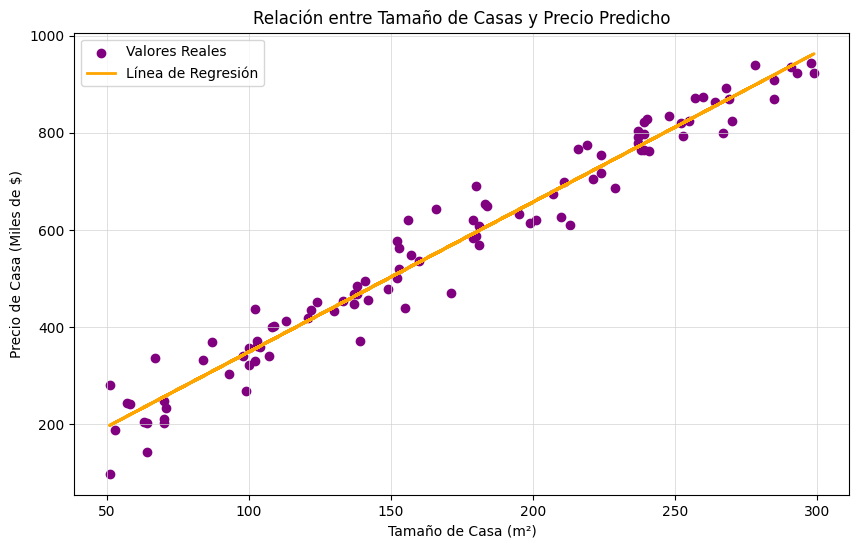

El modelo tiene un error cuadrático medio alto, lo que indica que las predicciones están más alejadas de los valores reales. Considere ajustar el modelo o agregar más variables.
Próximos pasos recomendados:
- Revisar si hay variables adicionales que podrían mejorar el modelo (como ubicación, número de habitaciones, etc.).
- Experimentar con modelos de regresión más complejos si los datos tienen una relación no lineal.
- Recoger más datos para mejorar la capacidad predictiva del modelo.


In [23]:
# Preparar las variables independientes y dependientes
X = data[['Size (m²)']]  # Variable independiente
y = data['Price (Thousands of $)']  # Variable dependiente

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir los precios de las casas
y_pred = model.predict(X)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)

# Mostrar el MSE
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', label='Valores Reales')  # Puntos de datos en color púrpura
plt.plot(X, y_pred, color='orange', linestyle='-', linewidth=2, label='Línea de Regresión')  # Línea de regresión en naranja
plt.title('Relación entre Tamaño de Casas y Precio Predicho', color='black')
plt.xlabel('Tamaño de Casa (m²)', color='black')
plt.ylabel('Precio de Casa (Miles de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

# Interpretación del resultado
if mse < 500:
    print("El modelo tiene un error cuadrático medio bajo, lo que indica que las predicciones están bastante cerca de los valores reales. El modelo es apto para predecir precios.")
else:
    print("El modelo tiene un error cuadrático medio alto, lo que indica que las predicciones están más alejadas de los valores reales. Considere ajustar el modelo o agregar más variables.")
    print("Próximos pasos recomendados:")
    print("- Revisar si hay variables adicionales que podrían mejorar el modelo (como ubicación, número de habitaciones, etc.).")
    print("- Experimentar con modelos de regresión más complejos si los datos tienen una relación no lineal.")
    print("- Recoger más datos para mejorar la capacidad predictiva del modelo.")

### **Métrica: Error Absoluto Medio (MAE)**
Mide la diferencia promedio en valor absoluto entre los valores predichos y los valores reales. También indica qué tan preciso es el modelo.

**Explicación del Código para MAE:**

- Calcular el MAE:

Utilizamos **mean_absolute_error de sklearn.metrics** para calcular el MAE, que mide el promedio de los errores absolutos entre los valores reales y los predichos.

- Visualización del Modelo:

El gráfico es similar al que se utiliza para el MSE, mostrando los puntos de datos reales y la línea de regresión para proporcionar una visualización clara de cómo se ajusta el modelo a los datos.

- Interpretación de Resultados en Consola:

**Si el MAE es bajo (< 20):** Se indica que el modelo predice con bastante precisión y es adecuado para hacer predicciones.

**Si el MAE es alto (≥ 20):** Se sugiere que el modelo no está prediciendo bien y se proporcionan recomendaciones sobre cómo mejorar el modelo.


MAE (Error Absoluto Medio): 33.17


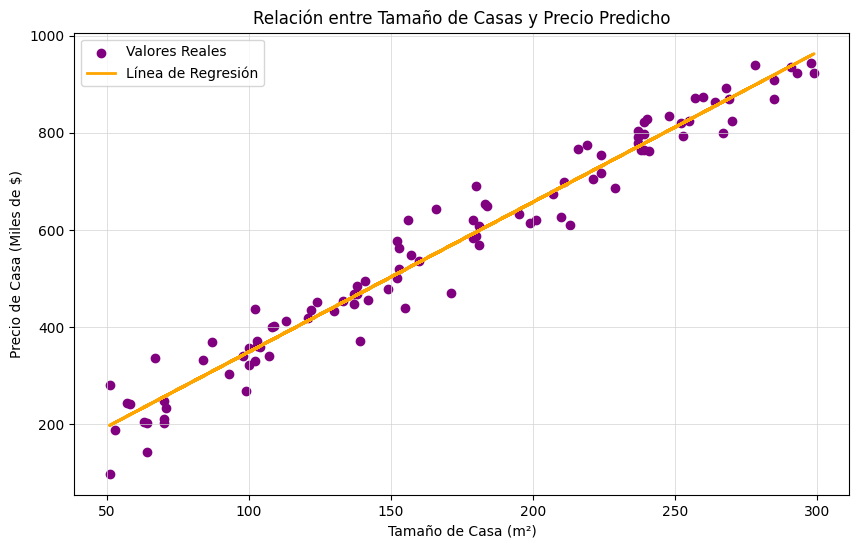

El modelo tiene un error absoluto medio alto, lo que indica que las predicciones están más alejadas de los valores reales. Considere ajustar el modelo o agregar más variables.
Próximos pasos recomendados:
- Verificar si hay variables adicionales que podrían mejorar el modelo (por ejemplo, ubicación, número de habitaciones, etc.).
- Experimentar con modelos de regresión más complejos si los datos muestran una relación no lineal.
- Recolectar más datos para mejorar la precisión del modelo.


In [24]:
# Importar las bibliotecas necesarias (si no se han importado antes)
from sklearn.metrics import mean_absolute_error  # Módulo de scikit-learn para calcular el Error Absoluto Medio (MAE)

# Calcular el MAE
mae = mean_absolute_error(y, y_pred)

# Mostrar el MAE
print(f"MAE (Error Absoluto Medio): {mae:.2f}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', label='Valores Reales')  # Puntos de datos en color púrpura
plt.plot(X, y_pred, color='orange', linestyle='-', linewidth=2, label='Línea de Regresión')  # Línea de regresión en naranja
plt.title('Relación entre Tamaño de Casas y Precio Predicho', color='black')
plt.xlabel('Tamaño de Casa (m²)', color='black')
plt.ylabel('Precio de Casa (Miles de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

# Interpretación del resultado
if mae < 20:
    print("El modelo tiene un error absoluto medio bajo, lo que indica que las predicciones están bastante cerca de los valores reales. El modelo es apto para predecir precios.")
else:
    print("El modelo tiene un error absoluto medio alto, lo que indica que las predicciones están más alejadas de los valores reales. Considere ajustar el modelo o agregar más variables.")
    print("Próximos pasos recomendados:")
    print("- Verificar si hay variables adicionales que podrían mejorar el modelo (por ejemplo, ubicación, número de habitaciones, etc.).")
    print("- Experimentar con modelos de regresión más complejos si los datos muestran una relación no lineal.")
    print("- Recolectar más datos para mejorar la precisión del modelo.")


## *Evaluación de los modelos de Regresión**

¿Cuál de las 3 metricas abordadas en este notebook es la mejor?

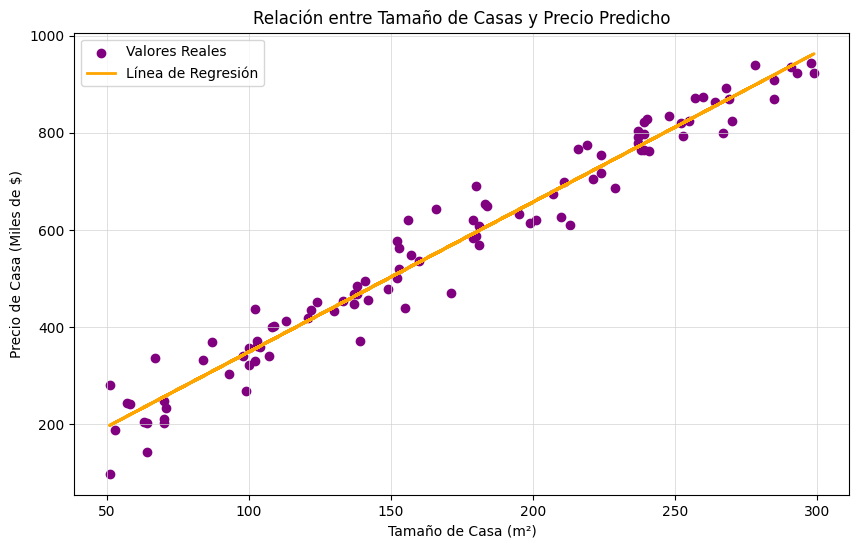

R² (Coeficiente de Determinación): 0.96
MSE (Error Cuadrático Medio): 1865.63
MAE (Error Absoluto Medio): 33.17

Comparación de Métricas:
La mejor métrica es R² con un valor de 0.96. El modelo se ajusta bien y es apto para predicciones precisas.


In [25]:

# Crear un DataFrame con los datos
data = pd.DataFrame({'Size (m²)': size, 'Price (Thousands of $)': price})

# Preparar las variables independientes y dependientes
X = data[['Size (m²)']]  # Variable independiente (predictora)
y = data['Price (Thousands of $)']  # Variable dependiente (respuesta)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir los precios de las casas
y_pred = model.predict(X)

# Calcular las métricas
r2 = r2_score(y, y_pred)  # Coeficiente de determinación
mse = mean_squared_error(y, y_pred)  # Error Cuadrático Medio
mae = mean_absolute_error(y, y_pred)  # Error Absoluto Medio

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='purple', label='Valores Reales')  # Puntos de datos en color púrpura
plt.plot(X, y_pred, color='orange', linestyle='-', linewidth=2, label='Línea de Regresión')  # Línea de regresión en naranja
plt.title('Relación entre Tamaño de Casas y Precio Predicho', color='black')
plt.xlabel('Tamaño de Casa (m²)', color='black')
plt.ylabel('Precio de Casa (Miles de $)', color='black')
plt.legend(loc='best')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

# Mostrar las métricas después de la gráfica
print(f"R² (Coeficiente de Determinación): {r2:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")

# Comparar las métricas y determinar la mejor
print("\nComparación de Métricas:")

if r2 > 0.8:
    mejor_metrica = 'R²'
    print(f"La mejor métrica es R² con un valor de {r2:.2f}. El modelo se ajusta bien y es apto para predicciones precisas.")
elif mse < 500:
    mejor_metrica = 'MSE'
    print(f"La mejor métrica es MSE con un valor de {mse:.2f}. El error cuadrático medio es bajo, lo que indica predicciones precisas.")
elif mae < 20:
    mejor_metrica = 'MAE'
    print(f"La mejor métrica es MAE con un valor de {mae:.2f}. El error absoluto medio es bajo, indicando una buena precisión en las predicciones.")
else:
    print("Ninguna métrica indica un ajuste excelente del modelo. Considere revisar los datos o el modelo.")